In [5]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the Dataset
pricing_data = pd.read_csv('Price Optimization Data.csv')

In [3]:
# Analyse the Top 5 rows of the Data
pricing_data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [4]:
# Let’s have a look at the column info before moving forward
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


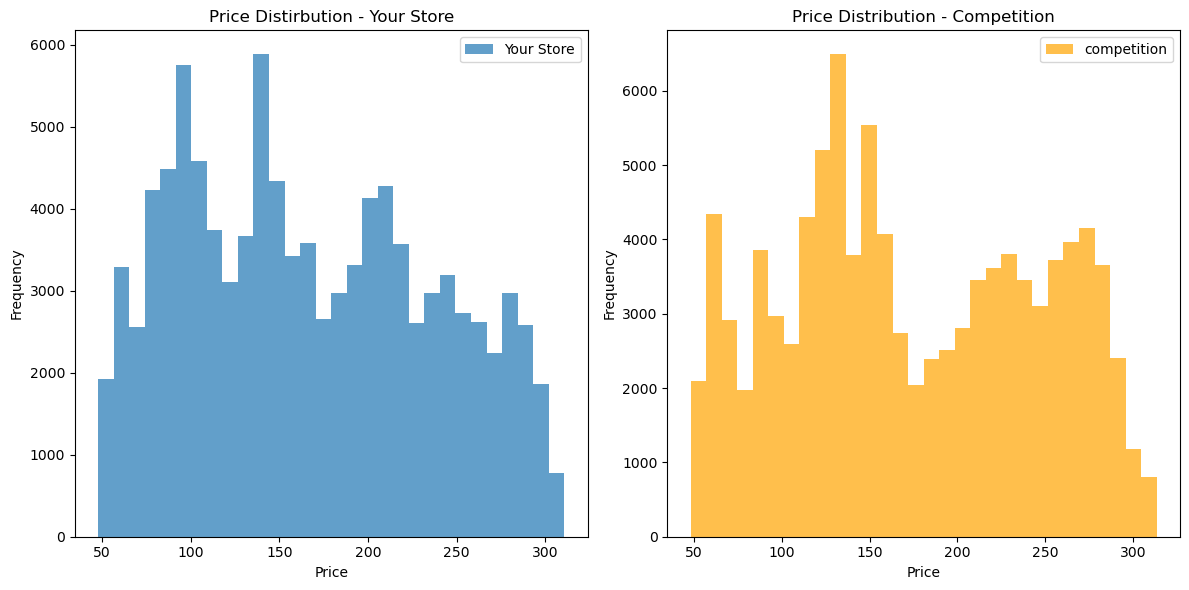

In [10]:
# Now let’s start by comparing the price distribution with the competition
plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
plt.hist(pricing_data['Price'], bins = 30, alpha = 0.7, label = 'Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distirbution - Your Store')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(pricing_data['Competition_Price'], bins = 30, alpha = 0.7, color = 'orange', label = 'competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')
plt.legend()

plt.tight_layout()
plt.show()

##### It shows that the competition’s prices are generally higher, with peaks around the 100-150 and 200-250 price ranges, which indicate a concentration of higher-priced items. In contrast, our store’s prices are more evenly distributed across the 50-300 range, with notable peaks around 100-150.

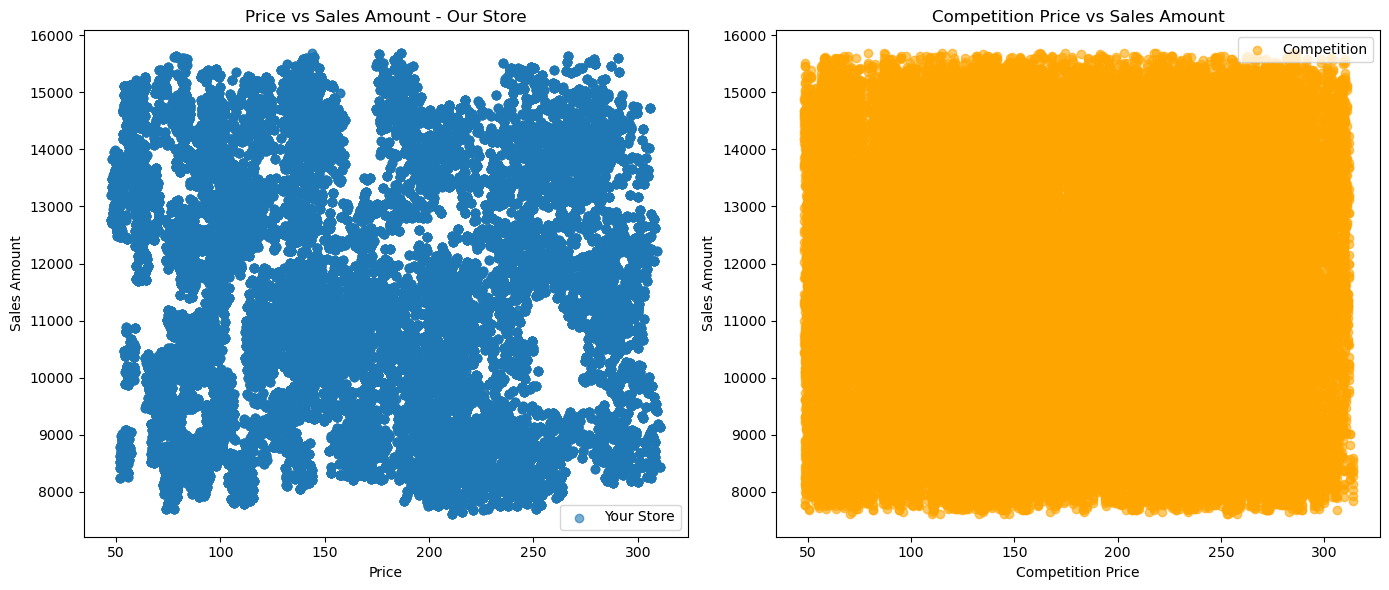

In [11]:
# Now let’s compare the relationship between price and sales
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'], alpha = 0.6, label = 'Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Our Store')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], alpha = 0.6, color = 'orange', label = 'Competition' )
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')
plt.legend()

plt.tight_layout()
plt.show()

##### The scatter plots compare the relationship between price and sales amount for our store (left) and the competition (right). For our store, the plot shows a wide dispersion of sales amounts across various price points, which indicates varied performance in different price ranges without a clear trend. In contrast, the competition’s plot shows a dense clustering of sales amounts around higher values, with prices also spread across a similar range but demonstrating a more consistent sales performance. It suggests that the competition might have a more effective pricing strategy, which maintains higher sales amounts more uniformly across different price points.

In [13]:
# Now let’s compare the price changes over time
pricing_data['Fiscal_Week_ID'] = pd.to_datetime(pricing_data['Fiscal_Week_ID']+ '-1', format='%Y-%U-%w')

In [14]:
weekly_prices = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

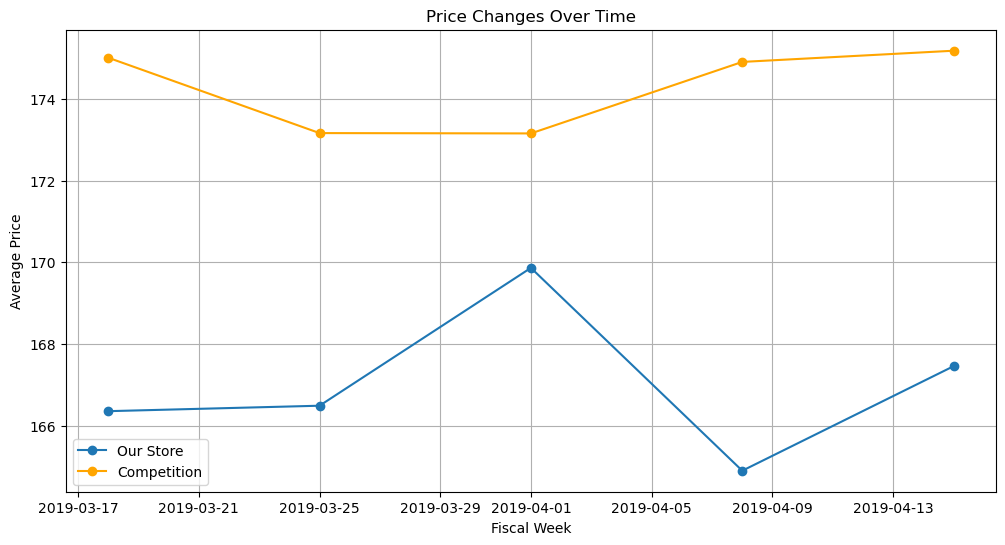

In [15]:
plt.figure(figsize = (12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label = 'Our Store', marker =  'o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label = 'Competition', marker = 'o', color = 'orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

##### The competition maintains higher average prices consistently above 170, with a slight upward trend over the observed weeks. In contrast, our store’s prices start around 166, increase slightly, then dip before rising again. It indicates that the competition follows a more stable pricing strategy, while our store experiences more fluctuations in pricing. The stability in the competition’s pricing could be contributing to their higher and more consistent sales performance.

In [16]:
# Now, let’s analyze how changes in prices affect the change in quantity sold. 

In [17]:
# For this, we need to calculate price elasticity. Here’s the formula used to calculate price elasticity
# Ed = % change in quantity demanded / % change in price

In [18]:
# Let’s calculate and visualize the price elasticity
pricing_data['price_change'] = pricing_data['Price'].pct_change()
pricing_data['qty_change'] = pricing_data['Item_Quantity'].pct_change()

In [19]:
pricing_data['elasticity'] = pricing_data['qty_change'] / pricing_data['price_change']

In [20]:
pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace = True)
pricing_data.dropna(subset=['elasticity'], inplace= True)

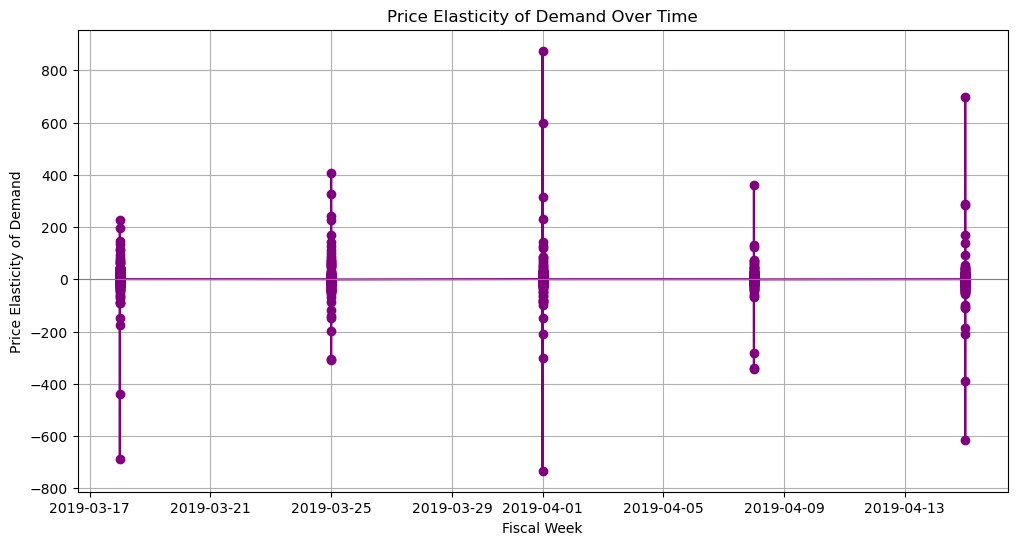

In [21]:
plt.figure(figsize = (12, 6))
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['elasticity'], marker = 'o', linestyle = '-', color = 'purple')
plt.axhline(0, color = 'grey', linewidth = 0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

##### The graph shows the price elasticity of demand over time. It highlights significant variability in elasticity across different weeks, with values ranging from highly negative to highly positive. It indicates that the sensitivity of quantity demanded to price changes fluctuates considerably. High positive elasticity suggests that in some weeks, demand increased significantly with price increases, while high negative elasticity in other weeks indicates a sharp drop in demand with price hikes. The broad spread of elasticity values implies an inconsistent response to price changes, which suggests that factors other than price, such as promotions, seasonality, or market conditions, might be influencing demand.

In [22]:
# Now let’s calculate and compare the total sales amounts for our store and the competition
total_sales_your_Store = pricing_data['Sales_Amount'].sum()
total_sales_competition = (pricing_data['Competition_Price'] * pricing_data['Item_Quantity']).sum()

In [23]:
total_qty_your_store = pricing_data['Item_Quantity'].sum()
total_qty_competition = pricing_data['Item_Quantity'].sum()

In [24]:
summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Competition': [total_sales_your_Store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})

In [25]:
summary

,Metric,Your Competition,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


##### Our store’s total sales amount is 114,100,500, whereas the competition’s total sales amount is 696,209,700 (assuming equal quantity sold). The competition has a significantly higher total sales amount compared to our store. It indicates that their pricing strategy is more effective in generating revenue.

In [26]:
# Now, we’ll analyze how the sales amounts vary across different price brackets to identify if there are specific price ranges where the competition outperforms our store

In [27]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']


In [42]:
# Create price brackets for both your store and the competition
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins = bins , labels = labels, right = False)
pricing_data['competition_price_bracket'] = pd.cut(pricing_data['Competition_Price'], bins = bins, labels = labels, right = False)

In [43]:
# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

C:\Users\Kamran\AppData\Local\Temp\ipykernel_33796\1954942852.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()


In [44]:
# calculate sales amount by price bracket for competition
pricing_data['competition_sales_amt'] = pricing_data['Competition_Price'] * pricing_data['Item_Quantity']
sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

C:\Users\Kamran\AppData\Local\Temp\ipykernel_33796\1560977952.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()


In [45]:
sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


##### The table shows the total sales amounts for both our store and the competition across different price brackets. Here are some key observations:

- 0-50 Bracket: The competition has significantly higher sales in this bracket.
- 51-100 Bracket: The competition outperforms our store by a wide margin.
- 101-150 Bracket: The competition’s sales are much higher than our store’s sales.
- 151-200 Bracket: The competition again has significantly higher sales.
- 201-250 Bracket: The competition’s sales are nearly double those of our store.
- 251-300 Bracket: The competition has higher sales, but the gap is smaller compared to other brackets.
- 301-350 Bracket: The competition has higher sales, though the overall sales amount is lower in this bracket compared to others.

#### Price Optimization with Dynamic Pricing


In [46]:
# Now let’s start with segmenting the data and calculating price elasticity for each segment
# segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_summary = pricing_data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
pricing_data = pd.merge(pricing_data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

C:\Users\Kamran\AppData\Local\Temp\ipykernel_33796\1002372852.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
C:\Users\Kamran\AppData\Local\Temp\ipykernel_33796\1002372852.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
C:\Users\Kamran\AppData\Local\Temp\ipykernel_33796\1002372852.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,segment,avg_elasticity
0,Medium,0.154444
1,High,0.148043


##### In the above code, we are segmenting customers based on their purchasing behaviour by analyzing the average price and total quantity sold for each item. First, we calculated the average price and total quantity sold for each item and merged this summary back into the main dataset. We then defined customer segments based on these average prices into three categories: Low, Medium, and High. For each segment, we calculated the price elasticity of demand by measuring how the percentage change in price affects the percentage change in quantity sold. Finally, we computed the average elasticity for each segment, which provides insights into how sensitive each segment is to price changes. This helps in understanding and optimizing pricing strategies for different customer segments.

The “High” segment has an average elasticity of 0.148043, indicating that these customers are more sensitive to price changes. In contrast, the “Medium” segment has a lower average elasticity of 0.154444, suggesting they are less responsive to price variations.

In [47]:
# Now let’s implement a dynamic pricing model by adjusting prices based on elasticity and simulating the impact on sales and revenue
# Create a copy of the dataset for simulation
dynamic_pricing_data = pricing_data.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# Compare total sales amount between existing and dynamic pricing
total_sales_existing = pricing_data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# Compare total quantity sold between existing and dynamic pricing
total_qty_existing = pricing_data['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


##### In the above code, we are simulating the impact of a dynamic pricing strategy on sales performance. First, we created a copy of the dataset for the simulation. We then applied dynamic pricing rules by increasing prices by 5% for the Medium segment and decreasing prices by 10% for the High segment. Then, we calculated new sales amounts based on these dynamic prices. Next, we compared the total sales amount and total quantity sold under the existing pricing and the dynamic pricing strategies.

In [48]:
# Now, let’s finish this task by adding the dynamic prices in the dataset
pricing_data['dynamic_price'] = dynamic_pricing_data['dynamic_price']

In [49]:
pricing_data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_braket,competition_sales_amt,competition_price_bracket,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,201-250,132.061224,21792,Medium,143.6295
1,20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,201-250,132.061224,21792,Medium,145.6035
2,30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,201-250,132.061224,21792,Medium,135.3765
3,40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,201-250,132.061224,21792,Medium,141.1725
4,50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,201-250,132.061224,21792,Medium,140.8365


#### Summary
So, this is how we can use the concept of price optimization to optimize prices for a product or service. Price optimization is a strategic approach that uses data collection on sales, costs, competition, and market trends to predict demand changes and analyze price elasticity, which enables businesses to set optimal prices.